In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
veriler = pd.read_csv("Churn_Modelling.csv")
veriler

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
X = veriler.iloc[:,3:13].values
Y = veriler.iloc[:,13].values

In [8]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
X[:,1] = le.fit_transform(X[:,1])

le2 = preprocessing.LabelEncoder()
X[:,2] = le.fit_transform(X[:,2])

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ohe = ColumnTransformer([("ohe",OneHotEncoder(dtype=float),[1])],remainder="passthrough")
X = ohe.fit_transform(X)
X = X[:,1:]
X

array([[0.0, 0.0, 228, ..., 1, 1, 101348.88],
       [1.0, 0.0, 217, ..., 0, 1, 112542.58],
       [0.0, 0.0, 111, ..., 1, 0, 113931.57],
       ...,
       [0.0, 0.0, 318, ..., 0, 1, 42085.58],
       [0.0, 1.0, 381, ..., 1, 0, 92888.52],
       [0.0, 0.0, 401, ..., 1, 0, 38190.78]], dtype=object)

In [9]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.33,random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)

In [13]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [14]:
classifier = Sequential()

In [18]:
classifier.add(Dense(6,kernel_initializer="glorot_uniform", activation = "relu",input_dim = 11))
classifier.add(Dense(6,kernel_initializer="glorot_uniform", activation = "relu"))
classifier.add(Dense(1,kernel_initializer="glorot_uniform", activation = "sigmoid"))

In [20]:
classifier.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])
classifier.fit(X_train,y_train,epochs=50)

Epoch 1/50
210/210 [==============================] - 2s 2ms/step - loss: 0.5417 - accuracy: 0.7842
Epoch 2/50
210/210 [==============================] - 0s 2ms/step - loss: 0.4625 - accuracy: 0.7979
Epoch 3/50
210/210 [==============================] - 0s 2ms/step - loss: 0.4429 - accuracy: 0.7979
Epoch 4/50
210/210 [==============================] - 0s 2ms/step - loss: 0.4318 - accuracy: 0.7999
Epoch 5/50
210/210 [==============================] - 0s 2ms/step - loss: 0.4173 - accuracy: 0.8163
Epoch 6/50
210/210 [==============================] - 0s 2ms/step - loss: 0.3974 - accuracy: 0.8354
Epoch 7/50
210/210 [==============================] - 0s 2ms/step - loss: 0.3845 - accuracy: 0.8427
Epoch 8/50
210/210 [==============================] - 0s 2ms/step - loss: 0.3776 - accuracy: 0.8454
Epoch 9/50
210/210 [==============================] - 0s 2ms/step - loss: 0.3725 - accuracy: 0.8470
Epoch 10/50
210/210 [==============================] - 0s 2ms/step - loss: 0.3677 - accuracy: 0.8500

In [21]:
y_pred = classifier.predict(X_test)
y_pred

104/104 [==============================] - 0s 1ms/step


array([[0.21886545],
       [0.22792111],
       [0.16357465],
       ...,
       [0.3153531 ],
       [0.47346783],
       [0.02290175]], dtype=float32)

In [22]:
y_pred = (y_pred>0.5)

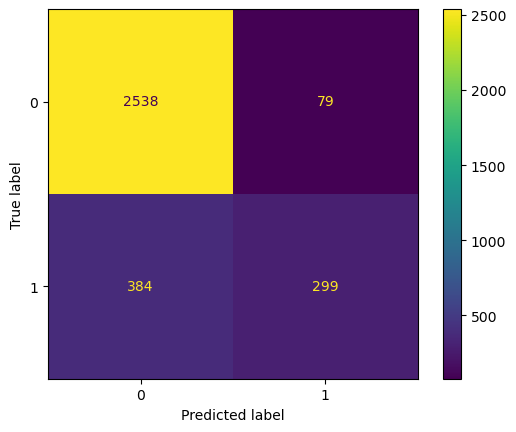

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
cmm = confusion_matrix(y_test,y_pred)
cm = ConfusionMatrixDisplay(cmm)
cm.plot()